<center><font size="+4">BPM 2025/2026</font></center>
<center><font size="+2">University of Pisa, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Four Classes on Process Mining</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Extra notebook </font></center>
<center><font size="+2">Advanced libraries for data manipulation and visualization</font></center>

- __Numpy__
- __Pandas__


> Useful to recap python and/or these two libraries before class 2
---
---

# Important links:

- Download material, code, optional assignments and other material page from our wiki
   - https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/wiki

- Install the required software
   - https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/wiki/Setup-your-machine

In [1]:
#Here we create a 'string' variable pointing to our repository...
url_github_repo_basic="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/main/"
url_github_repo=url_github_repo_basic+"BPM_PM/"

---

# Preliminaries
## The role of this notebook in the course

In the classes 2-3, we will give an overview of probably the two most famous python libraries
- Numpy
- Pandas

After this, in class 4 we will introduce pm4py
- The python library for process mining
- A python library based on Pandas (which, as we will see, is in turn based on Numpy).


Note:
- If you know how to program in python: good for you, it will make it easier for you :D
  - Ideally, you should have attended M1, covering how to program in basic python
- If you don't, **don't worry!**, in classes 2 and 3 we will try fill this gap. 
  - You may want to take a look at the material from M1. But it is not mandatory/necessary.

In classes 2-3 we will learn how to use
  - __advanced libraries__ (to get more efficiency and/or to consider bigger problems)
    * Often it is just a matter of changing the command used, but the logics stays the same
  - __libraries specifically tailored to PM__,

__We will unleash the power of Python!__
* We start from introducing popular Python libraries for data processing
* You can see this notebook as a first place to look at if you will need to use such libraries in the future.
  * It also contains examples and references to further material
* These notions will be central in future classes on PM

## What is this notebook about

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

---

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

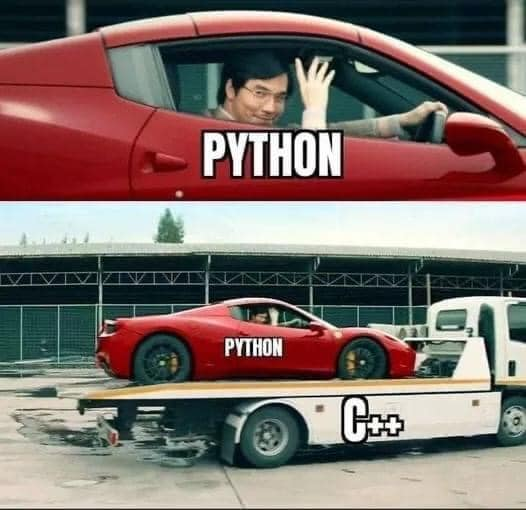

In [2]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/pythoncpp.jpg',width=600)
display(img)

## Install and import the NumPy module
The first time you run this notebook you might have to install 
- numpy (and later Pandas)

using the following script:

In [3]:
#%pip install --upgrade pip
#%pip install numpy
#!pip install numpy

After installing a module (only once), you should import it (everytime)
- The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [4]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done 
       - element-wise iterating over the elements of the arrays 
       - _at C level rather than at Python level_, obtaining better performances. 
     - We get a concise syntax
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In general, operations on arrays should be done on arrays with same _dimensions_
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

## The NumPy ndarray: A Multidimensional Array

### Performance comparison Numpy ndarrays vs Python lists

In [5]:
l=[1,2,3]
l

[1, 2, 3]

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [6]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))
np_arr
#py_list

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


array([      0,       1,       2, ..., 4999997, 4999998, 4999999])

Let's compute the square value of each element in the array/list

In [7]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

Test NumPy Array
CPU times: user 19.4 ms, sys: 69.9 ms, total: 89.3 ms
Wall time: 16.9 ms

Test Python list comprehension
CPU times: user 1.43 s, sys: 290 ms, total: 1.72 s
Wall time: 1.37 s

Test Python list iteration
CPU times: user 2.04 s, sys: 40 ms, total: 2.08 s
Wall time: 2.09 s

Tests completed


### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [8]:
#We have already imported numpy in a cell above
#import numpy as np

#np.random.seed()
np.random.seed(1)

# Generate a 2x3 matrix with random data in the interval [0,1)
data = np.random.rand(2, 3)
data

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02]])

In [9]:
data + data

array([[8.34044009e-01, 1.44064899e+00, 2.28749635e-04],
       [6.04665145e-01, 2.93511782e-01, 1.84677190e-01]])

In [10]:
np.random.rand(2, 3) * 10 + 10

array([[11.86260211, 13.45560727, 13.96767474],
       [15.38816734, 14.19194514, 16.852195  ]])

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [11]:
data


array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02]])

In [12]:
data * 10

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03],
       [3.02332573e+00, 1.46755891e+00, 9.23385948e-01]])

In [13]:
data + data

array([[8.34044009e-01, 1.44064899e+00, 2.28749635e-04],
       [6.04665145e-01, 2.93511782e-01, 1.84677190e-01]])

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [14]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the provided data

In [15]:
data1 = [6, 7.5, 8, 0, 1]
#data1 = [6, 7.5, 8, 0, 1,'a']
print(data1)
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6, 7.5, 8, 0, 1]
[6.  7.5 8.  0.  1. ]
(5,)
float64


__Why do we get `6.` and not `6`?__

List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [16]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [17]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [18]:
np.ones((3, 6))+1

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory
    - `stop` does not belong to the range
* Beware: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space
     - while python's `range` does not occupy much space

In [19]:
np.ones((3, 6))+1

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [20]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


In [21]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [22]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
print(arr1)
arr2 = np.array([1.1, 2.1, 3.1], dtype=np.int32)
print(arr2)
print(arr1.dtype)
print(arr2.dtype)

[1. 2. 3.]
[1 2 3]
float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [23]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

[1.1 2.1 3.1 4.1 5.1]
Before float64 

[1 2 3 4 5]
After  int32


### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [24]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays have `indexing` and `slicing` capabilities of lists

In [25]:
arr = np.arange(10)
print('arr',arr)
print('You can indexsingle entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

arr [0 1 2 3 4 5 6 7 8 9]
You can indexsingle entries:
arr[0] is 0
arr[5] is 5


In [26]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])
view58=arr[5:8]
view58

arr
 [0 1 2 3 4 5 6 7 8 9]
You can create slices:
arr[:8]  is
 [0 1 2 3 4 5 6 7]
arr[5:]  is
           [5 6 7 8 9]
arr[5:8] is
           [5 6 7]


array([5, 6, 7])

In [27]:
view58*2

array([10, 12, 14])

A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
  - The original array is changed as well!
* **Beware**: no data is copied

In [28]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

After arr[5:8] = 12 arr is
 [ 0  1  2  3  4 12 12 12  8  9]


In [30]:
my_view=arr[5:8] 
my_view[:] = 11
print('After arr is\n',arr)

After arr is
 [ 0  1  2  3  4 11 11 11  8  9]


Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or, again, _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [31]:
arr

array([ 0,  1,  2,  3,  4, 11, 11, 11,  8,  9])

In [32]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 11 11 11  8  9]
slice array [11 11 11]


In [33]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

source array (after arr_slice[1] = 12345):
 [    0     1     2     3     4    11 12345    11     8     9]


If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [34]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
arr1d=arr2d[0]
arr1d

array([1, 2, 3])

In [36]:
arr1d[2]

3

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [37]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


**See figure below for an illustration of indexing a 2D array** <br />
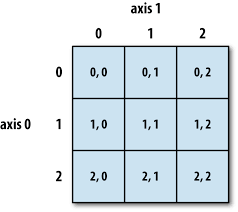

This is an example for 2-dimensional arrays
* It works similarly for higher dimensions...

##### **BEWARE**
- When __indexing__, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When __silicing__, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [38]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [39]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

[[2 3]
 [5 6]]


(2, 2)

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

In [40]:
print(arr2d[:2])
print()
print(arr2d[:2][1:])
arr2d[:2][1:].shape

[[1 2 3]
 [4 5 6]]

[[4 5 6]]


(1, 3)

##### **Let us go back to our slices...**

Further examples of indexing/slicing of higher dimensional arrays

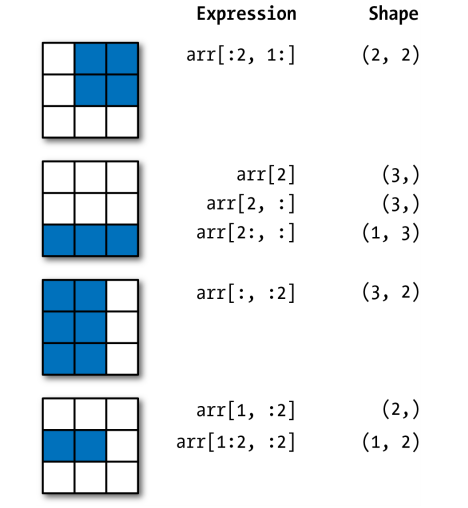

In [41]:
print(arr2d)
print()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]


We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [42]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Assigning to a slice expression assigns to the whole selection by broadcasting

In [43]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
arr2d[:2, 1:] = 0 
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [45]:
arr2_giamp=arr2d[:2, 1:]
arr2_giamp[:, :]=10

In [46]:
arr2_giamp

array([[10, 10],
       [10, 10]])

In [47]:
arr2d

array([[ 1, 10, 10],
       [ 4, 10, 10],
       [ 7,  8,  9]])

In [48]:
arr2_andrea = arr2d + 5
arr2_andrea

array([[ 6, 15, 15],
       [ 9, 15, 15],
       [12, 13, 14]])

### Select entries that satisfy a guard

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [49]:
data = np.random.randn(7, 4)
print('Data\n',data)

Data
 [[ 0.3190391  -0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944 -1.09989127]
 [-0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434]
 [ 0.90085595 -0.68372786 -0.12289023 -0.93576943]
 [-0.26788808  0.53035547 -0.69166075 -0.39675353]
 [-0.6871727  -0.84520564 -0.67124613 -0.0126646 ]]


We first see how to create a _mask_

In [50]:
data > 0

array([[ True, False,  True, False],
       [False, False,  True, False],
       [False, False,  True,  True],
       [False,  True,  True,  True],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False, False, False]])

Now we use the mask to access the entries of interest

In [51]:
data2=data[ data > 0 ]
print('Data2\n',data2)
data2.shape

Data2
 [0.3190391  1.46210794 1.13376944 0.04221375 0.58281521 1.14472371
 0.90159072 0.50249434 0.90085595 0.53035547]


(10,)

In [52]:
data[ data < 0 ] = 0
data

array([[0.3190391 , 0.        , 1.46210794, 0.        ],
       [0.        , 0.        , 1.13376944, 0.        ],
       [0.        , 0.        , 0.04221375, 0.58281521],
       [0.        , 1.14472371, 0.90159072, 0.50249434],
       [0.90085595, 0.        , 0.        , 0.        ],
       [0.        , 0.53035547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

> This will actually _copy_ your data
> - You get a __new 1-dimensional array__ containing the elements matching the condition

In [53]:
data2[0]=100
data

array([[0.3190391 , 0.        , 1.46210794, 0.        ],
       [0.        , 0.        , 1.13376944, 0.        ],
       [0.        , 0.        , 0.04221375, 0.58281521],
       [0.        , 1.14472371, 0.90159072, 0.50249434],
       [0.90085595, 0.        , 0.        , 0.        ],
       [0.        , 0.53035547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

How can I get elements within an interval?
- Or, in general, that satisfy a complex condition?

In [54]:
(data > 0)

array([[ True, False,  True, False],
       [False, False,  True, False],
       [False, False,  True,  True],
       [False,  True,  True,  True],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False, False, False]])

In [55]:
(data < 0.5) 

array([[ True,  True, False,  True],
       [ True,  True, False,  True],
       [ True,  True,  True, False],
       [ True, False, False, False],
       [False,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]])

In [56]:
(data > 0) & (data < 0.5) 

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [57]:
data3=data[ (data > 0) & (data < 0.5) ]
print('Data3\n',data3)
data3.shape

Data3
 [0.3190391  0.04221375]


(2,)

In [58]:
my_view=(data > 0) & (data < 0.5) 
my_view.astype(np.int32)

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [59]:
data1 = [6, 7.5, 8, 0, 1]
print(data1)
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6, 7.5, 8, 0, 1]
[6.  7.5 8.  0.  1. ]
(5,)
float64


## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [60]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special `T` attribute
* This is just a special reshape
* we compute a view - no actual copy

In [61]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

Matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Transposed matrix using T
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Transposed matrix transpose()
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

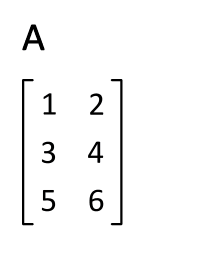

In [62]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [63]:
x = np.ones((2, 3, 4))
print(x)
print('\nThe 3-D matrix has shape \n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

The 3-D matrix has shape 
 (2, 3, 4)
Shape of x.transpose()
 (4, 3, 2)
Shape of x.transpose(0,2,1)
 (2, 4, 3)


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [64]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

m1
 [[0 1]
 [2 3]]
m2
 [[4 5]
 [6 7]]
m1.dot(m2)
 [[ 6  7]
 [26 31]]
Same as np.dot(m1,m2)
 [[ 6  7]
 [26 31]]


In [65]:
m1 = np.arange(4).reshape(2,2)
m1

array([[0, 1],
       [2, 3]])

In [66]:
m2 = (np.arange(4)+4).reshape(2,2)
m2

array([[4, 5],
       [6, 7]])

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [67]:
print(np.sqrt(m1))
print(m1 ** 0.5)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]


### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [68]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
mean 7.0
sum 105
standard deviation 4.320493798938574

array
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean 7.0
sum 105
standard deviation 4.320493798938574


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [69]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

sum of each column
 [15 18 21 24 27]
mean of each column
 [5. 6. 7. 8. 9.]
standard deviation of each column
 [4.0824829 4.0824829 4.0824829 4.0824829 4.0824829]

sum of each row
 [10 35 60]
mean of each row
 [ 2.  7. 12.]
standard deviation of each row
 [1.41421356 1.41421356 1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [70]:
#Sample from the normal distribution
arr = np.random.randn(8)
arr

array([-1.11731035,  0.2344157 ,  1.65980218,  0.74204416, -0.19183555,
       -0.88762896, -0.74715829,  1.6924546 ])

In [71]:
arr.sort()
arr

array([-1.11731035, -0.88762896, -0.74715829, -0.19183555,  0.2344157 ,
        0.74204416,  1.65980218,  1.6924546 ])

Multidimensional arrays are sorted for one chosen dimension
E.g. in matrices we can
* Sort across rows
* Sort across columns

In [72]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()

print('Original')
print(arr2d)

print('\n`sort(0)`: Sort the elements within each column (sort across rows)')
arr2d_cp0.sort(axis=0)
print('arr2d.sort(0)')
print(arr2d_cp0)

print('\n`sort(1)`: Sort the elements within each row (sort across columns)')
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

print('\n`sort( )`: Sorts across last axis  ( sort(1), sort across columns)')
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

Original
[[ 0.05080775 -0.63699565  0.19091548]
 [ 2.10025514  0.12015895  0.61720311]
 [ 0.30017032 -0.35224985 -1.1425182 ]
 [-0.34934272 -0.20889423  0.58662319]
 [ 0.83898341  0.93110208  0.28558733]]

`sort(0)`: Sort the elements within each column (sort across rows)
arr2d.sort(0)
[[-0.34934272 -0.63699565 -1.1425182 ]
 [ 0.05080775 -0.35224985  0.19091548]
 [ 0.30017032 -0.20889423  0.28558733]
 [ 0.83898341  0.12015895  0.58662319]
 [ 2.10025514  0.93110208  0.61720311]]

`sort(1)`: Sort the elements within each row (sort across columns)
arr2d.sort(1)
[[-0.63699565  0.05080775  0.19091548]
 [ 0.12015895  0.61720311  2.10025514]
 [-1.1425182  -0.35224985  0.30017032]
 [-0.34934272 -0.20889423  0.58662319]
 [ 0.28558733  0.83898341  0.93110208]]

`sort( )`: Sorts across last axis  ( sort(1), sort across columns)
arr2d.sort()
[[-0.63699565  0.05080775  0.19091548]
 [ 0.12015895  0.61720311  2.10025514]
 [-1.1425182  -0.35224985  0.30017032]
 [-0.34934272 -0.20889423  0.58662319]
 [

### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [73]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


## Logic functions 
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- obtaining an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [74]:
data = np.random.randn(7, 4)
data

array([[ 0.88514116, -0.75439794,  1.25286816,  0.51292982],
       [-0.29809284,  0.48851815, -0.07557171,  1.13162939],
       [ 1.51981682,  2.18557541, -1.39649634, -1.44411381],
       [-0.50446586,  0.16003707,  0.87616892,  0.31563495],
       [-2.02220122, -0.30620401,  0.82797464,  0.23009474],
       [ 0.76201118, -0.22232814, -0.20075807,  0.18656139],
       [ 0.41005165,  0.19829972,  0.11900865, -0.67066229]])

What numbers are greater than 0?

In [75]:
mask = data > 0
print(mask.dtype)
print(mask.shape)
mask

bool
(7, 4)


array([[ True, False,  True,  True],
       [False,  True, False,  True],
       [ True,  True, False, False],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False, False,  True],
       [ True,  True,  True, False]])

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [76]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

[[ True False  True  True]
 [False  True False  True]
 [ True  True False False]
 [False  True  True  True]
 [False False  True  True]
 [ True False False  True]
 [ True  True  True False]]



mask.any()
 True

mask.any(axis=0) - for each column
 [ True  True  True  True]

mask.any(axis=1) - for each row
 [ True  True  True  True  True  True  True]



mask.all()
 False

mask.all(axis=0) - for each column
 [False False False False]

mask.all(axis=1) - for each row
 [False False False False False False False]


# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with tabular data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation on multi-dimensional data like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [77]:
%pip install pandas

#import sys
#!"{sys.executable}" -m pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [79]:
#import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [80]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [81]:
type(obj)

pandas.core.series.Series

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [82]:
print('Series index: ',obj.index)
print('Series values: ',obj.values, 'type:',type(obj.values))

Series index:  RangeIndex(start=0, stop=4, step=1)
Series values:  [ 4  7 -5  3] type: <class 'numpy.ndarray'>


Let's now create a Series whose entries are labelled by characters.

In [83]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [84]:
print('Series index: ',obj2.index,'type:',type(obj2.index))
print('Series values: ',obj2.values, 'type:',type(obj2.values))

Series index:  Index(['d', 'b', 'a', 'c'], dtype='object') type: <class 'pandas.core.indexes.base.Index'>
Series values:  [ 4  7 -5  3] type: <class 'numpy.ndarray'>


### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [85]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[ ['c', 'a', 'd'] ])

obj2['d'] = 
 4
obj2['d']  (after obj2['d'] = 6) =
 6

You can also select a number of entries
obj2[['c', 'a', 'd']] =
c    3
a   -5
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [86]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [87]:
my_mask=obj2 > 0
my_mask

d     True
b     True
a    False
c     True
dtype: bool

In [88]:
import numpy as np

In [89]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

obj2
d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0]
d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2
d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2)
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


### Create a series, and NaN

You can create a Series using 
- a **dict**ionary 

In [90]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj4 = pd.Series(sdata)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

If you are interested in specific indexes, you can use
- a **dict**ionary 
- and a list as indexes of interest

In [91]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
#states = ['Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:
- They make a mask!

In [92]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [93]:
pd.notnull(obj4) 

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [94]:
obj4[pd.isnull(obj4)]

California   NaN
dtype: float64

In [95]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

## DataFrame
* A **Series** can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - an excel file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A Series is just a simpler version of a dataframe
  * A DataFrame is a series with 
    - **more main arrays** (one per column), and 
    - **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

> Most of the times, you will be loading data from external resources
> - local/remote CSV/excel files
> - queries on databases
> - webservices
> - ...
>
> Here we first show how to create one programmatically.

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

Essentially we _transpose_ the dictionary

In [96]:
data = { 'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [97]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

,state,pop,nonExistingColumn
0,Ohio,1.5,NaN
1,Ohio,1.7,NaN
2,Ohio,3.6,NaN
3,Nevada,2.4,NaN
4,Nevada,2.9,NaN
5,Nevada,3.2,NaN


In [98]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              6 non-null      object 
 1   pop                6 non-null      float64
 2   nonExistingColumn  0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [99]:
frame.describe()

,pop
count,6.000000
mean,2.550000
std,0.836062
min,1.500000
25%,1.875000
50%,2.650000
75%,3.125000
max,3.600000


If we don't specify columns of interest we load all of them

In [100]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [101]:
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [102]:
#frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1 = pd.DataFrame(data, index = ['o1','o2','o3','n1','n2','n3'] )
frame1

,state,year,pop
o1,Ohio,2000,1.5
o2,Ohio,2001,1.7
o3,Ohio,2002,3.6
n1,Nevada,2001,2.4
n2,Nevada,2002,2.9
n3,Nevada,2003,3.2


A column of a DataFrame can be retrieved, obtaining a Series 
* by dict-like notation 
* or by attribute:

In [103]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [104]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [105]:
#Select single column or sequence of columns from the DataFrame
frame2[ 'state' ] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [106]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [107]:

frame2[ ['state'] ]

,state
one,Ohio
two,Ohio
three,Ohio
four,Nevada
five,Nevada
six,Nevada


In [108]:
frame2[ ['state' ,'year'] ]

,state,year
one,Ohio,2000
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2002
six,Nevada,2003


In [109]:
frame2View=frame2[ ['state' ,'year'] ]
frame2View

,state,year
one,Ohio,2000
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2002
six,Nevada,2003


> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [110]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [111]:
pd.DataFrame(outer_dict, index=[2002, 2003])

,Nevada,Ohio
2002,2.9,3.6
2003,NaN,NaN


Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [112]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [113]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

By the way, do you remember what is nan? How can I handle it?

In [114]:
frame3.fillna(1)

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,1.0,1.5


In [115]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [116]:
frame3_NoNA=frame3.fillna(1)
frame3_NoNA

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,1.0,1.5


### Not-a-Number and column names

In [117]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [118]:
frameNaN = pd.DataFrame(data,columns=['state','pop','nonInitializedColumn'])
frameNaN

,state,pop,nonInitializedColumn
0,Ohio,1.5,NaN
1,Ohio,1.7,NaN
2,Ohio,3.6,NaN
3,Nevada,2.4,NaN
4,Nevada,2.9,NaN
5,Nevada,3.2,NaN


Can I get rid of NaN replacing them with a given value!?
   - Yes!

In [119]:
frameNaN.fillna(0)

,state,pop,nonInitializedColumn
0,Ohio,1.5,0
1,Ohio,1.7,0
2,Ohio,3.6,0
3,Nevada,2.4,0
4,Nevada,2.9,0
5,Nevada,3.2,0


> Beware: we create a new dataframe without modifying the original one

In [120]:
frameNaN

,state,pop,nonInitializedColumn
0,Ohio,1.5,NaN
1,Ohio,1.7,NaN
2,Ohio,3.6,NaN
3,Nevada,2.4,NaN
4,Nevada,2.9,NaN
5,Nevada,3.2,NaN


You can either
- Assign the result of fillna 
    - We are creating a new dataframe. 
    - This will NOT affect existing views of the dataframe
- Set parameter `inplace=True`
    - We are modifying the original dataframe. 
    - This will affect existing views of the dataframe

In [121]:
frameNaN_cp=frameNaN.fillna(0)
frameNaN_cp

,state,pop,nonInitializedColumn
0,Ohio,1.5,0
1,Ohio,1.7,0
2,Ohio,3.6,0
3,Nevada,2.4,0
4,Nevada,2.9,0
5,Nevada,3.2,0


In [122]:
frameNaN

,state,pop,nonInitializedColumn
0,Ohio,1.5,NaN
1,Ohio,1.7,NaN
2,Ohio,3.6,NaN
3,Nevada,2.4,NaN
4,Nevada,2.9,NaN
5,Nevada,3.2,NaN


In [123]:
frameNaN.fillna(0,inplace=True)
frameNaN

,state,pop,nonInitializedColumn
0,Ohio,1.5,0
1,Ohio,1.7,0
2,Ohio,3.6,0
3,Nevada,2.4,0
4,Nevada,2.9,0
5,Nevada,3.2,0


Well, 'nonInitializedColumn' is not a good name anymore :D
- Can I change the name of columns?
- **Yes!**

In [124]:
frameNaN.columns=['state','pop','initializedColumn']
frameNaN

,state,pop,initializedColumn
0,Ohio,1.5,0
1,Ohio,1.7,0
2,Ohio,3.6,0
3,Nevada,2.4,0
4,Nevada,2.9,0
5,Nevada,3.2,0


When replacing NaN, we might want to use default values depending on the data itself
> Replace all NaN with
> - the mean
> - the median

In [125]:
inner1 ={           2001: 2.4, 2002: 2.9, 2003: 10}
inner2 ={2000: 1.5, 2001: 1.7, 2002: 3.6, 2003: 12}

outer = {'Nevada': inner1, 'Ohio': inner2}
df = pd.DataFrame(outer)
df

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,10.0,12.0
2000,NaN,1.5


In [126]:
df.fillna(1)

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,10.0,12.0
2000,1.0,1.5


In [127]:
df.mean()

Nevada    5.1
Ohio      4.7
dtype: float64

In [128]:
df.fillna(df.mean())

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,10.0,12.0
2000,5.1,1.5


In [129]:
df[ ['Nevada'] ].fillna(df[['Nevada']].mean())

,Nevada
2001,2.4
2002,2.9
2003,10.0
2000,5.1


In [130]:
df.fillna(df.median())

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,10.0,12.0
2000,2.9,1.5


In [131]:
#df.median(axis=1)

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [132]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [133]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [134]:
frame2.debt=1.0
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,1.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,1.0
four,2001,Nevada,2.4,1.0
five,2002,Nevada,2.9,1.0
six,2003,Nevada,3.2,1.0


When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [135]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [136]:
#The following would not work
#frame2['debt'] = np.arange(7.)

In [137]:
frame2['debt'] = np.arange(6)

print(frame2)
frame2.dtypes

       year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4
six    2003  Nevada  3.2     5


year       int64
state     object
pop      float64
debt       int64
dtype: object

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict. The drop methid deletes columns

In [138]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [139]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [140]:
#frame2[ ['year','state'] ].dkndfkdkdm

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`
> * This would not work!

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one
    * As for `fillna`, it depends on the parameter `inplace`!

In [141]:
# #PLEASE AVOID THIS! 
# del frame2['eastern']
# frame2

# #better use drop method!
# frame2.drop(['eastern'])

In [142]:

frame2['new_col']=np.arange(6)
print('frame2')
frame2

frame2


,year,state,pop,debt,eastern,new_col
one,2000,Ohio,1.5,0,True,0
two,2001,Ohio,1.7,1,True,1
three,2002,Ohio,3.6,2,True,2
four,2001,Nevada,2.4,3,False,3
five,2002,Nevada,2.9,4,False,4
six,2003,Nevada,3.2,5,False,5


In [143]:
frame2drop = frame2.drop(['new_col'],axis=1)
frame2drop
# print('\nframe2drop')
# print(frame2drop)
# print('\nframe2')
# print(frame2)

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [144]:
frame2

,year,state,pop,debt,eastern,new_col
one,2000,Ohio,1.5,0,True,0
two,2001,Ohio,1.7,1,True,1
three,2002,Ohio,3.6,2,True,2
four,2001,Nevada,2.4,3,False,3
five,2002,Nevada,2.9,4,False,4
six,2003,Nevada,3.2,5,False,5


> Drop can modify the current DataFrame if setting `inplace=True`

In [145]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2 after dropping new_col')
print(frame2)

frame2
       year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

frame2 after dropping new_col
       year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False


If you try to drop a non-existing column
- E.g. you have already dropped it while reharsing before the class ;)
- You get an error. BUt you can ask to ignore such errors...

In [146]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [147]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [148]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [149]:
frame100 = frame2.drop(['five'])
frame100

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
six,2003,Nevada,3.2,5,False


In [150]:
frame100['year']=100
frame100

,year,state,pop,debt,eastern
one,100,Ohio,1.5,0,True
two,100,Ohio,1.7,1,True
three,100,Ohio,3.6,2,True
four,100,Nevada,2.4,3,False
six,100,Nevada,3.2,5,False


In [151]:
frame100.drop(['four','three'],inplace=True)
frame100

,year,state,pop,debt,eastern
one,100,Ohio,1.5,0,True
two,100,Ohio,1.7,1,True
six,100,Nevada,3.2,5,False


In [152]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


Similarly to multi-dimensional arrays, 
* you can **transpose** a dataframe:

In [153]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [154]:
frame2.T

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,0,1,2,3,4,5
eastern,True,True,True,False,False,False


In [155]:
frame2.transpose()

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,0,1,2,3,4,5
eastern,True,True,True,False,False,False


As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> BEWARE: A copy will be always created if the dataframe contains __mixed dtypes__

In [156]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [157]:
frame2.dtypes

year         int64
state       object
pop        float64
debt         int64
eastern       bool
dtype: object

In [158]:
frame2=frame2.astype({'year': 'int64'})
frame2.dtypes

year         int64
state       object
pop        float64
debt         int64
eastern       bool
dtype: object

> __ALERT: an almost 'bug' in pandas__

In [159]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

       year   state  pop  debt  eastern
one    1900    Ohio  1.5     0     True
two    1901    Ohio  1.7     1     True
three  1902    Ohio  3.6     2     True
four   1901  Nevada  2.4     3    False
five   1902  Nevada  2.9     4    False
six    1903  Nevada  3.2     5    False

          one   two three    four    five     six
year     2000  2001  2002    2001    2002    2003
state    Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop       1.5   1.7   3.6     2.4     2.9     3.2
debt        0     1     2       3       4       5
eastern  True  True  True   False   False   False


In [160]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

year       float64
state       object
pop        float64
debt         int64
eastern       bool
dtype: object

In [161]:
frame2.drop(['state','eastern'],axis=1,inplace=True,errors='ignore')
frame2

,year,pop,debt
one,1900.0,1.5,0
two,1901.0,1.7,1
three,1902.0,3.6,2
four,1901.0,2.4,3
five,1902.0,2.9,4
six,1903.0,3.2,5


In [162]:
frame2.dtypes

year    float64
pop     float64
debt      int64
dtype: object

We now have just floats. 
- Therefore a copy will be created only if required

In [163]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

         year  pop  debt
one    1800.0  1.5     0
two    1801.0  1.7     1
three  1802.0  3.6     2
four   1801.0  2.4     3
five   1802.0  2.9     4
six    1803.0  3.2     5

         one     two   three    four    five     six
year  1900.0  1901.0  1902.0  1901.0  1902.0  1903.0
pop      1.5     1.7     3.6     2.4     2.9     3.2
debt     0.0     1.0     2.0     3.0     4.0     5.0


### Indexing, selection, and filtering


> Indexing and slicing work differently in DataFrames
> - __Indexing__ works on __columns__
> - __Slicing__ works on __rows__

Indexing into a DataFrame
- allows to retrieving one or more of its __columns__:

In [164]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [165]:
data['two'] #retrieving one column (a series)

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [166]:
data[ ['two'] ] #retrieving one column (a dataframe)

,two
Ohio,1
Colorado,5
Utah,9
New York,13


In [167]:
data[['three', 'one']] #retrieving two columns (a dataframe)

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


If you select by slicing or Boolean expression, 
- it is interpreted as a selection on __rows__

In [168]:
data[:2] #rows by slicing 

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [169]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [170]:
data[ data['three'] > 5 ]  #rows by a boolean array

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Dataframes is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [171]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [172]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [173]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [174]:
data.iloc[:,1] # second column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [175]:
data.iloc[:,-1] # last column

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four, dtype: int64

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [176]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [177]:
data.iloc[:, :2] # all rows, first 2 columns

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [178]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

,one,two
Utah,8,9
New York,12,13


In [179]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

,four,one,two
Colorado,7,4,5
Utah,11,8,9


The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [180]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [181]:
print("data.loc[['Colorado','Ohio']]")
data.loc[['Colorado','Ohio']] #List of labels index.

data.loc[['Colorado','Ohio']]


,one,two,three,four
Colorado,4,5,6,7
Ohio,0,1,2,3


In [182]:
print()
print("data.loc[:,'one']")
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.


data.loc[:,'one']
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


In [183]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [184]:
data.loc['Colorado':'New York', 'two':]

,two,three,four
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


### Arithmetics and Data Alignment
When summing 2 dataframes with different indexes or columns, we get a dataframe where
* Entries with column and index present in both dataframes have a proper value 
* The others have NaN

If you sum using method `add`
- `fill_value` can force a default value to be used when an entry exists only in one dataframe

This is known as __data alignment__

#### If not using `fill_value`, column-index must exist in both dataframes

In [185]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=['a','b'],
                   index=['Texas', 'Colorado'])
df1

,a,b
Texas,0.0,1.0
Colorado,2.0,3.0


In [186]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=['a','b','c'],
                   index=['Texas'])
df2

,a,b,c
Texas,4.0,5.0,6.0


In [187]:
df1 + df2

,a,b,c
Colorado,NaN,NaN,NaN
Texas,4.0,6.0,NaN


In [188]:
df1.add(df2)

,a,b,c
Colorado,NaN,NaN,NaN
Texas,4.0,6.0,NaN


#### If using `fill_value`, column-index must exist in one dataframe

In [189]:
df1.add(df2)

,a,b,c
Colorado,NaN,NaN,NaN
Texas,4.0,6.0,NaN


If you want to see **Colorado** in the result
- You can fill a **default value**

In [190]:
df_sum=df1.add(df2, fill_value=0)
df_sum

,a,b,c
Colorado,2.0,3.0,NaN
Texas,4.0,6.0,6.0


In [191]:
df_sum.fillna(0)

,a,b,c
Colorado,2.0,3.0,0.0
Texas,4.0,6.0,6.0


In [192]:
df_sum = df1.add(df2, fill_value=100)
df_sum

,a,b,c
Colorado,102.0,103.0,NaN
Texas,4.0,6.0,106.0


> `Colorado,c` remains NA because it does not appear in any dataframe

### Function application and mapping

#### A digression on `lambda` functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function that computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [193]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

<class 'function'>


3

In [194]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

The result is 3
The result is 2


A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements
* We will see that we can ask Pandas to apply a lambda expression to a dataframe. This cannot be done with normal functions

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

#### A nerdish digression to read if interested

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [195]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


In [196]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [197]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

For example
- `np.abs(frame)` applies element-wise `abs` to all values in the dataframe `frame`

In [198]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,-0.375285
Texas,-0.638730,0.423494,0.077340
Oregon,-0.343854,0.043597,-0.620001


In [199]:
np.abs(frame)

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,0.375285
Texas,0.638730,0.423494,0.077340
Oregon,0.343854,0.043597,0.620001


But you can also `apply` any function thought for 1d arrays to each column or row.
- This gives you freedom in creating your own functions

In [200]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

#my_abs2 = lambda arr: my_abs(arr)
#frame.apply(my_abs2)

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,0.375285
Texas,0.638730,0.423494,0.077340
Oregon,0.343854,0.043597,0.620001


In [201]:
f = lambda arr: arr.abs() * 2 + 2
frame.apply(f)

,b,d,e
Utah,2.755128,2.243643,4.258968
Ohio,4.397836,2.370313,2.750570
Texas,3.277461,2.846989,2.154680
Oregon,2.687707,2.087194,3.240002


Can I apply a function conditionally to the values in the dataframe?
- `frame.apply(f)` or `frame.apply(f,axis=0)`
  - You work on columns (can access and use single values by index)
- `frame.apply(f,axis=1)`
  - You work on rows (can access and use single values by column names)

In [202]:
frame

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,-0.375285
Texas,-0.638730,0.423494,0.077340
Oregon,-0.343854,0.043597,-0.620001


In [203]:
# Double only columns where Texas is > 0
f = lambda arr: arr*2 if arr.Texas>0 else arr-100
frame.apply(f,axis=0) #same as axis="rows"

,b,d,e
Utah,-99.622436,0.243643,2.258968
Ohio,-98.801082,0.370313,-0.750570
Texas,-100.638730,0.846989,0.154680
Oregon,-100.343854,0.087194,-1.240002


In [204]:
frame

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,-0.375285
Texas,-0.638730,0.423494,0.077340
Oregon,-0.343854,0.043597,-0.620001


In [205]:
# Double only rows where b is positive and e is negative
f = lambda arr: arr*2 if arr.d>0 and arr.e<0 else arr-100
frame.apply(f,axis=1) #same as axis="columns"

,b,d,e
Utah,-99.622436,-99.878179,-98.870516
Ohio,2.397836,0.370313,-0.750570
Texas,-100.638730,-99.576506,-99.922660
Oregon,-0.687707,0.087194,-1.240002


If the applied function aggregates an array into a value, you get a Series with
- an index per column
- the aggregated value of each column

As usual, you can use `axis` to work on rows rather than on columns

In [206]:
frame

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,-0.375285
Texas,-0.638730,0.423494,0.077340
Oregon,-0.343854,0.043597,-0.620001


In [207]:
f = lambda arr: arr.max()
frame.apply(f)

b    1.198918
d    0.423494
e    1.129484
dtype: float64

In [208]:
frame.apply(f, axis='columns')

Utah      1.129484
Ohio      1.198918
Texas     0.423494
Oregon    0.043597
dtype: float64

Python functions for scalars (single values) rather than arrays (entire columns) can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [209]:
frame

,b,d,e
Utah,0.377564,0.121821,1.129484
Ohio,1.198918,0.185156,-0.375285
Texas,-0.638730,0.423494,0.077340
Oregon,-0.343854,0.043597,-0.620001


In [210]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

,b,d,e
Utah,3.775638,1.218213,11.294839
Ohio,11.989179,1.851564,-3.752850
Texas,-6.387304,4.234944,0.773401
Oregon,-3.438537,0.435969,-6.200008


In [211]:
frame['e'].map(times_ten)

Utah      11.294839
Ohio      -3.752850
Texas      0.773401
Oregon    -6.200008
Name: e, dtype: float64

In [212]:
frame[['e']].applymap(times_ten)

,e
Utah,11.294839
Ohio,-3.752850
Texas,0.773401
Oregon,-6.200008


### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [213]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [214]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [215]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

,c,a,b
three,0,1,2
two,3,4,5
one,6,7,8


In [216]:
frame.sort_index() # sorting by the index

,c,a,b
one,6,7,8
three,0,1,2
two,3,4,5


In [217]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

,c,b,a
three,0,2,1
two,3,5,4
one,6,8,7


We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [218]:
frame

,c,a,b
three,0,1,2
two,3,4,5
one,6,7,8


In [219]:
frame.sort_values(by='b',ascending=False)

,c,a,b
one,6,7,8
two,3,4,5
three,0,1,2


### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [220]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [221]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [222]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [223]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax return:
* the index containing the minimum or maximum values

In [224]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [225]:
df.idxmax()

one    b
two    d
dtype: object

In [226]:
df['one'].idxmax()

'b'

In [227]:
df.loc[ df['one'].idxmax() ]

one    7.1
two   -4.5
Name: b, dtype: float64

In [228]:
df.idxmin()

one    d
two    b
dtype: object

The method `describe` computes a number of summary statistics in one shot:

In [229]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 268.0+ bytes


 ### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [231]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [232]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

array(['b', 'a'], dtype=object)

In [233]:
df.two.value_counts() # computes a Series containing value frequencies:

b    3
a    1
Name: two, dtype: int64

In [234]:
#df.value_counts()

`isin` is responsible for 
- vectorized set membership 

In [235]:
df.one

1      a
2    NaN
3      b
4      a
Name: one, dtype: object

In [236]:
df.one.isin(['b', 'a'])

1     True
2    False
3     True
4     True
Name: one, dtype: bool

In [237]:
df.one[df.one.isin(['b', 'a'])]

1    a
3    b
4    a
Name: one, dtype: object

In [238]:
df.one[df.one.isin(['b'])]

3    b
Name: one, dtype: object

In certain cases, you might want to **filter out missing data**
- As we have seen, you can use [`fillna`](https://www.w3resource.com/pandas/dataframe/dataframe-fillna.php) 
    - to fill NaN values with a given one
    - this creates a copy of the dataframe!
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) 
    - to drop rows with at least one NaN
    - Or columns with at least one NaN using `dropna(axis='columns')`
    - this creates a copy of the dataframe!    

In [239]:
df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [240]:
df.fillna(0)

,one,two
1,a,b
2,0,a
3,b,b
4,a,b


In [241]:
#df['one']=df.one.fillna(0)

In [242]:
df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [243]:
df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [244]:
df.dropna()

,one,two
1,a,b
3,b,b
4,a,b


In [245]:
df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [246]:
df.dropna(axis='columns')

,two
1,b
2,a
3,b
4,b


###  Bin values into discrete intervals

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.

Pandas supports these approaches using the cut and qcut function:
 * [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.
 * [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html): Discretize variable into equal-sized buckets, based on sample quantiles

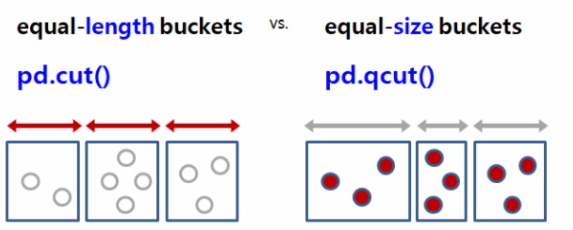

In [247]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/binning.PNG',width=500)
display(img)

In [248]:
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

In [249]:
df_age = pd.DataFrame({'Age': np.random.normal(30, 2, 1000) })
df_age
df_age.sort_values(by='Age')

,Age
793,23.892471
153,24.413830
562,24.418007
268,24.434931
639,24.603277
...,...
73,35.056651
937,35.130906
215,36.061714
633,36.642158


> `cut` somehow corresponds to histograms...

Text(0, 0.5, 'Frequency')

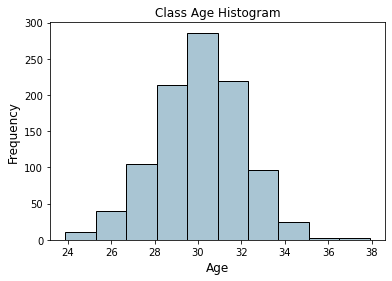

In [250]:
fig, ax = plt.subplots()
df_age['Age'].hist(bins=10, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Class Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [251]:
df_age

,Age
0,31.396064
1,29.105743
2,32.449015
3,30.806983
4,31.187157
...,...
995,29.627117
996,29.289517
997,30.192228
998,30.304105


In [252]:
print("cut")
df_age['bucket_cut'] = pd.cut(df_age.Age, 3) 
print(df_age['bucket_cut'].value_counts())# .plot(kind='bar')

print("\nqcut")
df_age['bucket_qcut'] = pd.qcut(df_age.Age, 3) 
print(df_age['bucket_qcut'].value_counts())# .plot(kind='bar')

cut
(28.567, 33.242]    732
(23.878, 28.567]    215
(33.242, 37.917]     53
Name: bucket_cut, dtype: int64

qcut
(23.891, 29.29]     334
(29.29, 30.989]     333
(30.989, 37.917]    333
Name: bucket_qcut, dtype: int64


In [253]:
df_age

,Age,bucket_cut,bucket_qcut
0,31.396064,"(28.567, 33.242]","(30.989, 37.917]"
1,29.105743,"(28.567, 33.242]","(23.891, 29.29]"
2,32.449015,"(28.567, 33.242]","(30.989, 37.917]"
3,30.806983,"(28.567, 33.242]","(29.29, 30.989]"
4,31.187157,"(28.567, 33.242]","(30.989, 37.917]"
...,...,...,...
995,29.627117,"(28.567, 33.242]","(29.29, 30.989]"
996,29.289517,"(28.567, 33.242]","(23.891, 29.29]"
997,30.192228,"(28.567, 33.242]","(29.29, 30.989]"
998,30.304105,"(28.567, 33.242]","(29.29, 30.989]"


In [254]:
df_age

,Age,bucket_cut,bucket_qcut
0,31.396064,"(28.567, 33.242]","(30.989, 37.917]"
1,29.105743,"(28.567, 33.242]","(23.891, 29.29]"
2,32.449015,"(28.567, 33.242]","(30.989, 37.917]"
3,30.806983,"(28.567, 33.242]","(29.29, 30.989]"
4,31.187157,"(28.567, 33.242]","(30.989, 37.917]"
...,...,...,...
995,29.627117,"(28.567, 33.242]","(29.29, 30.989]"
996,29.289517,"(28.567, 33.242]","(23.891, 29.29]"
997,30.192228,"(28.567, 33.242]","(29.29, 30.989]"
998,30.304105,"(28.567, 33.242]","(29.29, 30.989]"


PhD Student    732
Student        215
Post-Doc        53
Name: bucket_q, dtype: int64


<AxesSubplot:>

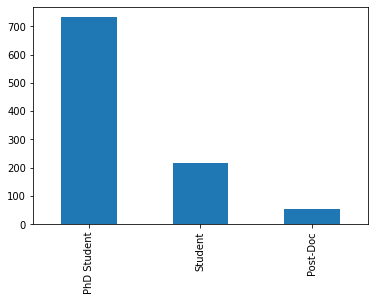

In [255]:
df_age['bucket_q'] = pd.cut(df_age.Age, 3,  labels=["Student", "PhD Student", "Post-Doc"]) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')
df_age['bucket_q'].value_counts().plot(kind='bar')

In [256]:
df_age

,Age,bucket_cut,bucket_qcut,bucket_q
0,31.396064,"(28.567, 33.242]","(30.989, 37.917]",PhD Student
1,29.105743,"(28.567, 33.242]","(23.891, 29.29]",PhD Student
2,32.449015,"(28.567, 33.242]","(30.989, 37.917]",PhD Student
3,30.806983,"(28.567, 33.242]","(29.29, 30.989]",PhD Student
4,31.187157,"(28.567, 33.242]","(30.989, 37.917]",PhD Student
...,...,...,...,...
995,29.627117,"(28.567, 33.242]","(29.29, 30.989]",PhD Student
996,29.289517,"(28.567, 33.242]","(23.891, 29.29]",PhD Student
997,30.192228,"(28.567, 33.242]","(29.29, 30.989]",PhD Student
998,30.304105,"(28.567, 33.242]","(29.29, 30.989]",PhD Student


In [257]:
df_age

,Age,bucket_cut,bucket_qcut,bucket_q
0,31.396064,"(28.567, 33.242]","(30.989, 37.917]",PhD Student
1,29.105743,"(28.567, 33.242]","(23.891, 29.29]",PhD Student
2,32.449015,"(28.567, 33.242]","(30.989, 37.917]",PhD Student
3,30.806983,"(28.567, 33.242]","(29.29, 30.989]",PhD Student
4,31.187157,"(28.567, 33.242]","(30.989, 37.917]",PhD Student
...,...,...,...,...
995,29.627117,"(28.567, 33.242]","(29.29, 30.989]",PhD Student
996,29.289517,"(28.567, 33.242]","(23.891, 29.29]",PhD Student
997,30.192228,"(28.567, 33.242]","(29.29, 30.989]",PhD Student
998,30.304105,"(28.567, 33.242]","(29.29, 30.989]",PhD Student


In [258]:
df_age[['Age','bucket_q']].sort_values(by='Age')

,Age,bucket_q
793,23.892471,Student
153,24.413830,Student
562,24.418007,Student
268,24.434931,Student
639,24.603277,Student
...,...,...
73,35.056651,Post-Doc
937,35.130906,Post-Doc
215,36.061714,Post-Doc
633,36.642158,Post-Doc


In [259]:
 pd.cut(df_age.Age, [10,20,30,40]).value_counts()

(30, 40]    516
(20, 30]    484
(10, 20]      0
Name: Age, dtype: int64

### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [260]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [261]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [262]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [263]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


Note, you might need to sort the resulting dataframe

In [264]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [265]:
result.sort_index()

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


What if some rows have same index?
- You get more rows with same index! 

In [266]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [267]:
result.loc[4]

,A,B,C,D
4,A4,B4,C4,D4
4,A4,B4,C4,D4


If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use `concat` only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

In [268]:
result_reset=result.reset_index()
result_reset

,index,A,B,C,D
0,4,A4,B4,C4,D4
1,5,A5,B5,C5,D5
2,6,A6,B6,C6,D6
3,7,A7,B7,C7,D7
4,4,A4,B4,C4,D4
5,5,A5,B5,C5,D5
6,6,A6,B6,C6,D6
7,7,A7,B7,C7,D7


You might also be interested in dropping duplicate rows (i.e., with same values apart from index)

In [269]:
result_reset.drop_duplicates()

,index,A,B,C,D
0,4,A4,B4,C4,D4
1,5,A5,B5,C5,D5
2,6,A6,B6,C6,D6
3,7,A7,B7,C7,D7


Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [270]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True,errors='ignore')
df2

,A,B,C,E
4,A4,B4,C4,E8
5,A5,B5,C5,E9
6,A6,B6,C6,E10
7,A7,B7,C7,E11


In [271]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [272]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,C4,NaN,E8
5,A5,B5,C5,NaN,E9
6,A6,B6,C6,NaN,E10
7,A7,B7,C7,NaN,E11
8,A8,B8,C8,D8,NaN
9,A9,B9,C9,D9,NaN


#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [273]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [274]:
right

,key,C,D
0,K0,C0,D0
1,K0,C1,D1
2,K2,C2,D2
3,K2,C3,D3


We note that
- K0 and K2 appear in both dataframes
- K1 and K3 appear only in left

We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [275]:
pd.merge(left, right,  how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K2,A2,B2,C2,D2
3,K2,A2,B2,C3,D3


In [276]:
pd.merge(left, right,  how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K1,A1,B1,NaN,NaN
3,K2,A2,B2,C2,D2
4,K2,A2,B2,C3,D3
5,K3,A3,B3,NaN,NaN


In [277]:
pd.merge(left, right,  how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K1,A1,B1,NaN,NaN
3,K2,A2,B2,C2,D2
4,K2,A2,B2,C3,D3
5,K3,A3,B3,NaN,NaN


- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

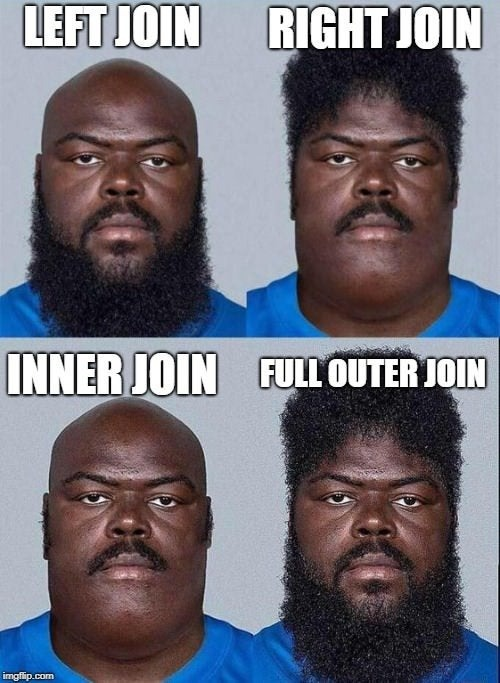

In [278]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/join.jpeg',width=500)
display(img)

What if you want to ignore certain columns? 

In [279]:
pd.merge(left, right,  how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K2,A2,B2,C2,D2
3,K2,A2,B2,C3,D3


In [280]:
right

,key,C,D
0,K0,C0,D0
1,K0,C1,D1
2,K2,C2,D2
3,K2,C3,D3


In [281]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

,key,A,B,C
0,K0,A0,B0,C0
1,K0,A0,B0,C1
2,K2,A2,B2,C2
3,K2,A2,B2,C3


##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Load/manipulate remote CSV file: Simple application to Italian COVID data

In [282]:
import numpy as np
import pandas as pd

Using Python and pandas, it is easy to read data from CSV files

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)
* You also find a local copy downloaded on 26/01/2021 in our wiki (follow the link dataset from the right-menu)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [283]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


In [284]:
covid_data

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2025-01-04T17:00:00,ITA,1278,45,1323,201663,202986,74,280,26562161,...,284325249,70571636.0,NaN,3.0,NaN,NaN,9973077.0,16990736.0,103275200.0,181050049.0
1777,2025-01-05T17:00:00,ITA,1267,48,1315,201806,203121,135,196,26562218,...,284329947,70572388.0,NaN,3.0,NaN,NaN,9973129.0,16990880.0,103276127.0,181053820.0
1778,2025-01-06T17:00:00,ITA,1289,49,1338,201783,203121,0,101,26562319,...,284333343,70573017.0,NaN,2.0,NaN,NaN,9973158.0,16990952.0,103276857.0,181056486.0
1779,2025-01-07T17:00:00,ITA,1314,48,1362,201844,203206,85,155,26562384,...,284338302,70573883.0,NaN,0.0,NaN,NaN,9973220.0,16991044.0,103277626.0,181060676.0


In [285]:
covid_data.head(10)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,...,18661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,...,21127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,...,23345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,...,25856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,...,29837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
covid_data.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
1776,2025-01-04T17:00:00,ITA,1278,45,1323,201663,202986,74,280,26562161,...,284325249,70571636.0,NaN,3.0,NaN,NaN,9973077.0,16990736.0,103275200.0,181050049.0
1777,2025-01-05T17:00:00,ITA,1267,48,1315,201806,203121,135,196,26562218,...,284329947,70572388.0,NaN,3.0,NaN,NaN,9973129.0,16990880.0,103276127.0,181053820.0
1778,2025-01-06T17:00:00,ITA,1289,49,1338,201783,203121,0,101,26562319,...,284333343,70573017.0,NaN,2.0,NaN,NaN,9973158.0,16990952.0,103276857.0,181056486.0
1779,2025-01-07T17:00:00,ITA,1314,48,1362,201844,203206,85,155,26562384,...,284338302,70573883.0,NaN,0.0,NaN,NaN,9973220.0,16991044.0,103277626.0,181060676.0
1780,2025-01-08T17:00:00,ITA,1315,44,1359,201946,203305,99,390,26562666,...,284349697,70575339.0,NaN,3.0,NaN,NaN,9973389.0,16991265.0,103279246.0,181070451.0


In [287]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    1781 non-null   object 
 1   stato                                   1781 non-null   object 
 2   ricoverati_con_sintomi                  1781 non-null   int64  
 3   terapia_intensiva                       1781 non-null   int64  
 4   totale_ospedalizzati                    1781 non-null   int64  
 5   isolamento_domiciliare                  1781 non-null   int64  
 6   totale_positivi                         1781 non-null   int64  
 7   variazione_totale_positivi              1781 non-null   int64  
 8   nuovi_positivi                          1781 non-null   int64  
 9   dimessi_guariti                         1781 non-null   int64  
 10  deceduti                                1781 non-null   int6

In [288]:
covid_data.describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,...,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,1781.000000,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1781.000000,162.000000,...,1.781000e+03,1.781000e+03,1.726000e+03,1498.000000,0.0,0.0,1.455000e+03,1.455000e+03,1.455000e+03,1.455000e+03
mean,7088.037619,640.353172,7728.391353,3.555437e+05,3.632721e+05,114.028074,14970.061202,1.512505e+07,145133.318922,345928.216049,...,1.563346e+07,1.772970e+08,4.919885e+07,39.718959,NaN,NaN,8.171171e+06,1.083959e+07,8.749335e+07,1.273776e+08
std,7898.776034,973.538666,8835.372007,4.322126e+05,4.359967e+05,16431.105052,27891.734438,1.103205e+07,59378.589694,217856.889628,...,1.105828e+07,1.103058e+08,2.415391e+07,56.889354,NaN,NaN,2.458939e+06,6.965488e+06,2.182236e+07,6.308720e+07
min,101.000000,17.000000,127.000000,9.400000e+01,2.210000e+02,-116092.000000,30.000000,1.000000e+00,7.000000,0.000000,...,2.290000e+02,4.324000e+03,9.353100e+05,0.000000,NaN,NaN,2.351466e+06,9.570000e+02,2.861735e+07,1.168590e+05
25%,1689.000000,69.000000,1779.000000,1.189450e+05,1.216410e+05,-1904.000000,904.000000,3.683189e+06,123927.000000,223237.500000,...,4.146722e+06,6.240541e+07,2.928186e+07,6.000000,NaN,NaN,6.543402e+06,1.712678e+06,7.725649e+07,7.582888e+07
50%,3627.000000,224.000000,3890.000000,1.834870e+05,1.864430e+05,-13.000000,3964.000000,1.972254e+07,172397.000000,236256.500000,...,2.112464e+07,2.376388e+08,6.309936e+07,18.000000,NaN,NaN,9.693763e+06,1.559769e+07,9.990863e+07,1.641746e+08
75%,8940.000000,541.000000,9424.000000,4.561840e+05,4.721960e+05,1143.000000,17030.000000,2.585769e+07,192312.000000,341673.000000,...,2.621455e+07,2.765685e+08,6.951731e+07,40.000000,NaN,NaN,9.927212e+06,1.676810e+07,1.026952e+08,1.767583e+08
max,34697.000000,4068.000000,38507.000000,2.713594e+06,2.734906e+06,172462.000000,220532.000000,2.656267e+07,198683.000000,988470.000000,...,2.696465e+07,2.843497e+08,9.530363e+07,324.000000,NaN,NaN,1.036965e+07,1.699126e+07,1.032792e+08,1.810705e+08


In [289]:
covid_data['data']

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1776    2025-01-04T17:00:00
1777    2025-01-05T17:00:00
1778    2025-01-06T17:00:00
1779    2025-01-07T17:00:00
1780    2025-01-08T17:00:00
Name: data, Length: 1781, dtype: object

In [290]:
covid_data[ ['data','terapia_intensiva'] ]

,data,terapia_intensiva
0,2020-02-24T18:00:00,26
1,2020-02-25T18:00:00,35
2,2020-02-26T18:00:00,36
3,2020-02-27T18:00:00,56
4,2020-02-28T18:00:00,64
...,...,...
1776,2025-01-04T17:00:00,45
1777,2025-01-05T17:00:00,48
1778,2025-01-06T17:00:00,49
1779,2025-01-07T17:00:00,48


In [291]:
covid_data[ ['terapia_intensiva','data'] ]

,terapia_intensiva,data
0,26,2020-02-24T18:00:00
1,35,2020-02-25T18:00:00
2,36,2020-02-26T18:00:00
3,56,2020-02-27T18:00:00
4,64,2020-02-28T18:00:00
...,...,...
1776,45,2025-01-04T17:00:00
1777,48,2025-01-05T17:00:00
1778,49,2025-01-06T17:00:00
1779,48,2025-01-07T17:00:00


<AxesSubplot:>

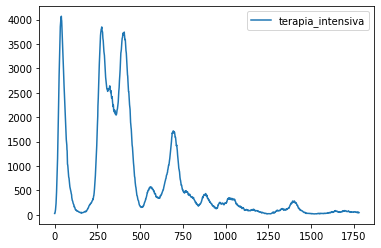

In [292]:
covid_data[ ['data','terapia_intensiva'] ].plot()

<AxesSubplot:>

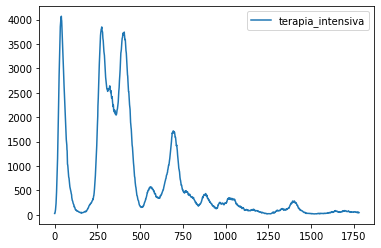

In [294]:
covid_data[ ['data','terapia_intensiva'] ].plot()

In [295]:
covid_data.data

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1776    2025-01-04T17:00:00
1777    2025-01-05T17:00:00
1778    2025-01-06T17:00:00
1779    2025-01-07T17:00:00
1780    2025-01-08T17:00:00
Name: data, Length: 1781, dtype: object

In [296]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [297]:
covid_data.iloc[-1]

data                                      2025-01-08T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                   1315
terapia_intensiva                                          44
totale_ospedalizzati                                     1359
isolamento_domiciliare                                 201946
totale_positivi                                        203305
variazione_totale_positivi                                 99
nuovi_positivi                                            390
dimessi_guariti                                      26562666
deceduti                                               198683
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                          26964654
tamponi                                             284349697
casi_testati                                       70575339.0
note    

In [298]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
print(type(last_day))
print(last_day)

<class 'str'>
2025-01-08T17:00:00


Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [299]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

0       False
1       False
2       False
3       False
4       False
        ...  
1776    False
1777    False
1778    False
1779    False
1780     True
Name: data, Length: 1781, dtype: bool


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
1780,2025-01-08T17:00:00,ITA,1315,44,1359,201946,203305,99,390,26562666,...,284349697,70575339.0,NaN,3.0,NaN,NaN,9973389.0,16991265.0,103279246.0,181070451.0


In [300]:
cov_regions_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [301]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [302]:
covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')

In [303]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

# Plot dataframes: Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

## Install required libraries

In [304]:
## install Yahoo! Finance market data downloader for Pandas
#pandas_datareader not necessary anymore. use yfinance
#%pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
%pip install yfinance

# %pip install matplotlib #'the' pyhton package for creating plots 
%pip install -U Jinja2 # Helps formatting strings with HTML and CSS.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [305]:
#%pip uninstall -y yfinance
#%pip install yfinance

In [306]:
# Libraries to download the dats
#import pandas_datareader.data as web
import yfinance as yf

#Libraries for data visualization and manipulation
import matplotlib.pyplot as plt #MATLAB-like plotting framework.
import pandas as pd

#A type to represent dates
from datetime import datetime

## The next 2 sub-sections in 4 lines of code: Download and combine data of interest

In the next sections, we show step by step how to
- Download data in different dataframes
- Extract and conmbine the data of interest

For pedagogical reasons, we do it in a long/verbose way. The same result can be obtained with these lines of code

In [307]:
#Specify the period of interest:
today = datetime.today().strftime('%Y-%m-%d')
first_day=datetime(2004,8,19)

companies=['AAPL', 'IBM', 'MSFT', 'GOOG']

yf.download(companies,first_day,today, auto_adjust=True)['Close']

[*********************100%***********************]  4 of 4 completed

4 Failed downloads:
['MSFT', 'IBM', 'GOOG', 'AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,


## Download data

In [308]:
yf.download('GOOG')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOG']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [309]:
yf.download('IBM')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IBM']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [310]:
yf.download('IBM',"2004-08-19","2023-02-01")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IBM']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Do you know dictionary comprehensions?

In [311]:
#Get today as a date object
today = datetime.today().strftime('%Y-%m-%d')
print(today)

first_day=datetime(2004,8,19)
print(first_day)

# #https://finance.yahoo.com/quote/AAPL/history?period1=1467770400&period2=1625536799&interval=1d&frequency=1d&filter=history&guccounter=1&guce_referrer=aHR0cDovL2xvY2FsaG9zdDo4ODg4Lw&guce_referrer_sig=AQAAAByrNT-HvDMWtenDoAglNPRKNaphvEwT3rMevHGT-mKwGMlw5NvAj3GlaBn1ztprmTfT4vIDwdzHgXvFpe72e3ISW5I0FoYRmSqR1SzvVcwg8VmpqbFpYQn8lMZqSHSkhru9c3-fOHLDo5dWLBUiR9iqs0kLoNADVPIfhXtw72_x
all_data = { ticker: yf.download(ticker,first_day,today,auto_adjust=True)
               for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']
           }
all_data['AAPL']


#auto_adjust: bool
#            Adjust all OHLC automatically? Default is False

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IBM']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOG']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


2025-03-17
2004-08-19 00:00:00


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


## Extract and combine data of interest

In [312]:
all_data.keys()

dict_keys(['AAPL', 'IBM', 'MSFT', 'GOOG'])

In [313]:
all_data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [314]:
all_data['IBM']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [315]:
#dictionary = {ticker: data['Adj Close'] for ticker, data in all_data.items()}
dictionary = {ticker: data['Close'] for ticker, data in all_data.items()}
dictionary

{'AAPL': Series([], Name: Close, dtype: float64),
 'IBM': Series([], Name: Close, dtype: float64),
 'MSFT': Series([], Name: Close, dtype: float64),
 'GOOG': Series([], Name: Close, dtype: float64)}

Let us collect only the closing prices for each company
- Watch out: the following line of code works with python 3.9. If you are running python 3.10, comment it out, and decomment the second 
- In short: if you get an error, use the second price =...

P.S.: the compact version to download data does not have this issue

In [316]:
#If running python 3.9
price = pd.DataFrame({ticker: data['Close'] for ticker, data in all_data.items()})
#If running python 3.10
#price = pd.DataFrame({ticker: data['Close'][ticker] for ticker, data in all_data.items()})

price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,


In [317]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,


In [318]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    0 non-null      float64
 1   IBM     0 non-null      float64
 2   MSFT    0 non-null      float64
 3   GOOG    0 non-null      float64
dtypes: float64(4)
memory usage: 0.0+ bytes


> Or, as mentioned... one can directly download this dataframe in one go

In [319]:
# https://stackoverflow.com/questions/71729671/python-yfinance-failed-downloads-no-data-found-symbol-may-be-delisted
#help(yf.download)

yf.download(['AAPL', 'IBM', 'MSFT', 'GOOG'],'2022-1-1',today, auto_adjust=True)['Close']

[*********************100%***********************]  4 of 4 completed

4 Failed downloads:
['GOOG', 'AAPL', 'MSFT', 'IBM']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,


## Compute, plot, and smooth returns

Now, creating a simple plot of the dataframe takes only 1 line

<AxesSubplot:xlabel='Date'>

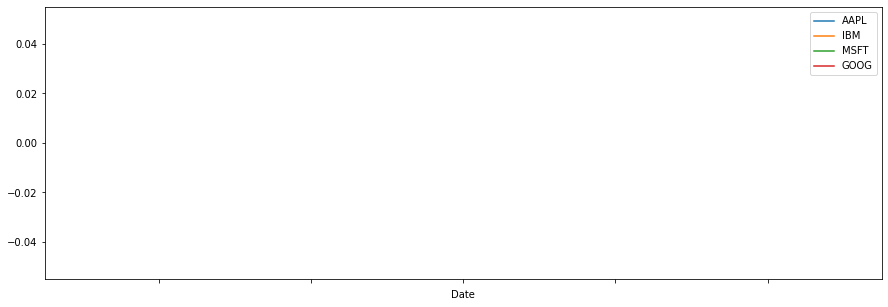

In [320]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [321]:
returns = price.pct_change() 
returns.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,


In [322]:
returns.dropna(inplace=True)
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,


<AxesSubplot:xlabel='Date'>

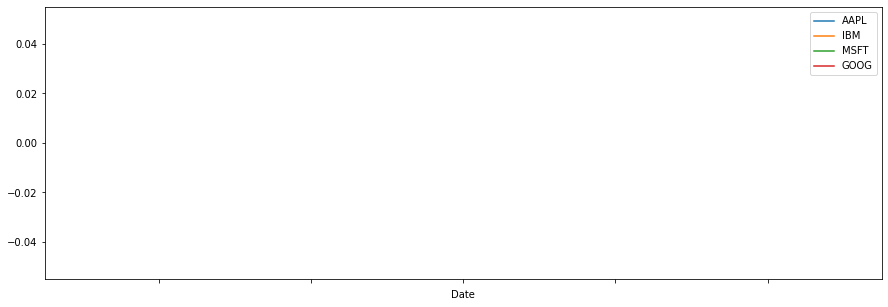

In [323]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [324]:
returns_smooth=returns.rolling(15).mean()
returns_smooth
#returns_smooth.head(16)

,AAPL,IBM,MSFT,GOOG
Date,,,,


In this case
- It makes sense to drop the NA rows...

In [325]:
returns_smooth.dropna(inplace=True)
returns_smooth

,AAPL,IBM,MSFT,GOOG
Date,,,,


<AxesSubplot:xlabel='Date'>

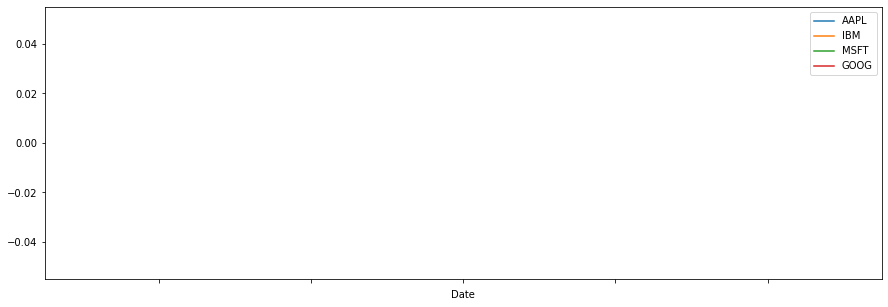

In [326]:
returns_smooth.plot(figsize=(15,5))

## Are there any correlations among these companies?

DataFrames offer two methods for computing 
* the __correlation__ among the elements in the DataFrame (`corr`)
* the __covariance__ matrix of the DataFrame (`cov`)

In [327]:
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,


In [328]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,NaN,NaN,NaN,NaN
IBM,NaN,NaN,NaN,NaN
MSFT,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,NaN,NaN


In [329]:
returns.corr().style.background_gradient(cmap='Reds')

/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,AAPL,IBM,MSFT,GOOG
AAPL,nan,nan,nan,nan
IBM,nan,nan,nan,nan
MSFT,nan,nan,nan,nan
GOOG,nan,nan,nan,nan


In [330]:
returns.cov()

/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/pandas/core/frame.py:9679: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,AAPL,IBM,MSFT,GOOG
AAPL,NaN,NaN,NaN,NaN
IBM,NaN,NaN,NaN,NaN
MSFT,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,NaN,NaN


In [331]:
returns.cov().style.background_gradient(cmap='Reds')

/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/pandas/core/frame.py:9679: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/andrea/Documents/python_envs/env_research/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/andrea/Documents/python_envs/env_research/lib/python3.

,AAPL,IBM,MSFT,GOOG
AAPL,nan,nan,nan,nan
IBM,nan,nan,nan,nan
MSFT,nan,nan,nan,nan
GOOG,nan,nan,nan,nan


## What about risk?

__Please, forgive my ignorance :D__

For each company, we can calculate:
- the mean of the returns
- the standard deviation of the returns

These statistics are very important for investors:
- Mean returns give us an understanding of the profitability of an investment
- The standard deviation measures how much the returns fluctuate. 
  - We call this __risk__. 

> Typically __higher risks are associated with higher returns__. 
> - Which company has highest returns?
> - Which company has highest risk?

In [332]:
returns.mean()

AAPL   NaN
IBM    NaN
MSFT   NaN
GOOG   NaN
dtype: float64

In [333]:
print("The maximum mean is in:",returns.mean().idxmax() )
print("The maximum standard deviation is in:",returns.std().idxmax())

The maximum mean is in: nan
The maximum standard deviation is in: nan


In [334]:
returns.mean()

AAPL   NaN
IBM    NaN
MSFT   NaN
GOOG   NaN
dtype: float64

In [335]:
returns.std()

AAPL   NaN
IBM    NaN
MSFT   NaN
GOOG   NaN
dtype: float64

In [336]:
returns.describe()

,AAPL,IBM,MSFT,GOOG
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [337]:
returns.describe().loc['mean':'std']

,AAPL,IBM,MSFT,GOOG
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN


ValueError: zero-size array to reduction operation minimum which has no identity

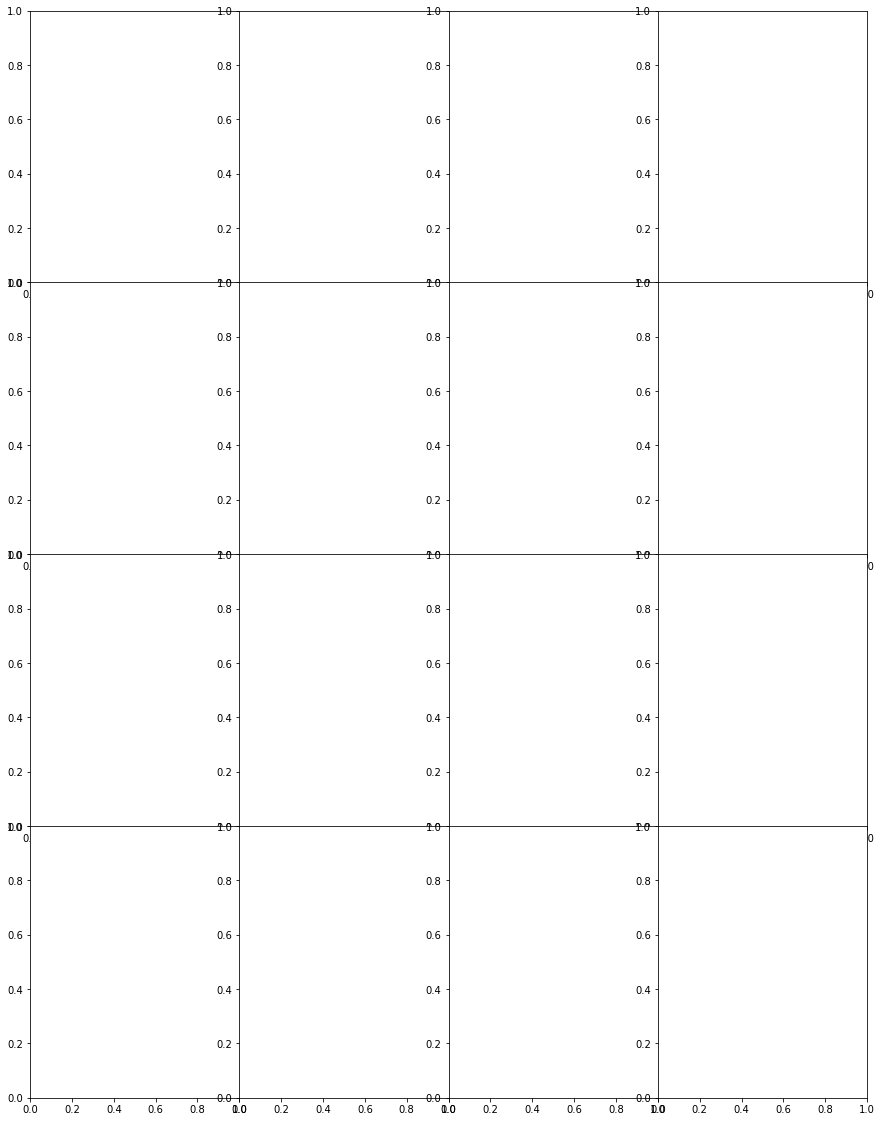

In [338]:
pd.plotting.scatter_matrix(returns,figsize =(15,20),  color='k', alpha=0.3)
plt.show()

## Interested in playing more with this case study?

https://towardsdatascience.com/analyzing-financial-data-in-python-ccf5c99f55e8

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Ftowardsdatascience.com%2Fanalyzing-financial-data-in-python-ccf5c99f55e8%3Fgi%3D7a3fb215ea05

> A few things changes in the library after the post has been written
> - Adapt our code to download new financial data
> - The webpage contains material on __risk analysis!__

## What about the Italian stock market?

In [ ]:
# Import all libraries

import yfinance as yf

import matplotlib.pyplot as plt 
import pandas as pd

from datetime import datetime

In [ ]:
#Just a test to check whether data can be downloaded
#yf.download('REC.MI')

In [ ]:
#Set first and last day of interest, and download data

today = datetime.today().strftime('%Y-%m-%d')
print(today)

first_day=datetime(2004,8,19)
print(first_day)

companies=['REC.MI', 'BRE.MI', 'IP.MI', 'STLAM.MI']
price=yf.download(companies,first_day,today, auto_adjust=True)['Close']

price

In [ ]:
price.plot(figsize=(15,5))

In [ ]:
returns = price.pct_change() 
returns.head()

In [ ]:
returns.dropna(inplace=True)
returns

In [ ]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [ ]:
returns_smooth=returns.rolling(15).mean()

returns_smooth.dropna(inplace=True)

returns_smooth
#returns_smooth.head(16)

In [ ]:
returns_smooth.plot(figsize=(15,5))

In [ ]:
returns.corr().style.background_gradient(cmap='Reds')

# More on plotting: More complex application to Italian COVID data
Pandas offers a number of plotting methods for DataFrame objects

In [ ]:
#%pip install matplotlib

#import sys
#!"{sys.executable}" -m pip install matplotlib

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [ ]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy

Pandas considers the date as a string
- Let's tell to pands that it is a date
- This will allow us to reason in terms of time

In [ ]:
covid_italy.info()

In [ ]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [ ]:
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]
covid_italy_filter

During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

In [ ]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [ ]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

In [ ]:
#Symbol \ allows to split a line in two
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, \
                                   title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

In [ ]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), \
    linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

In [ ]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

What about recent months?

In [ ]:
covid_italy_filter.loc[covid_italy_filter.index>= datetime(2022, 1, 1)].plot(figsize=(20, 7), \
                                                        linewidth=3, alpha=0.8, title="Since 2022") 



## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

In [ ]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

#plt.show()

In [ ]:
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']]

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

In [ ]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [ ]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

In [ ]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

In [ ]:
covid_italy['totale_casi']

In [ ]:
covid_italy['terapia_intensiva']

In [ ]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [ ]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido",\
             "tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

In [ ]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()